In [1]:
from juice import *
import matplotlib.pyplot as plt

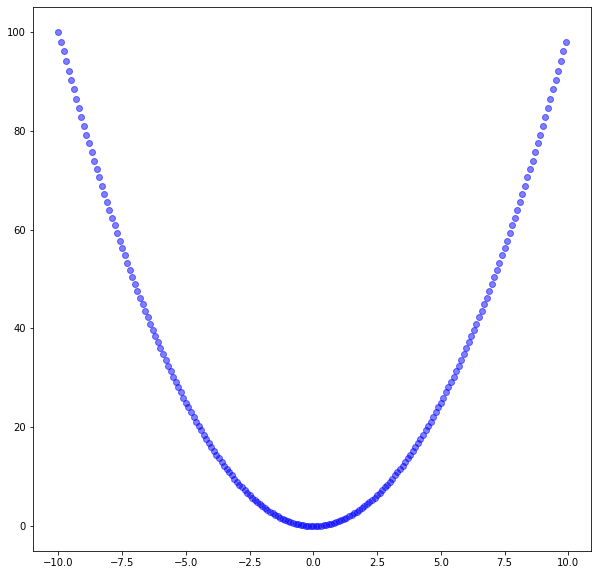

In [2]:
xs = [i*0.1 for i in range(-100, 100)]
ys = [i**2 for i in xs]

plt.figure(figsize=(10, 10))
plt.plot(xs, ys, 'bo', alpha = 0.5,)
plt.show()

In [3]:
w = [
    [-1, 1],
    [1, -1]
]


g1 = lambda x : Generative1D(x, w)

print(g1(2))

[array(-1), array(1)]


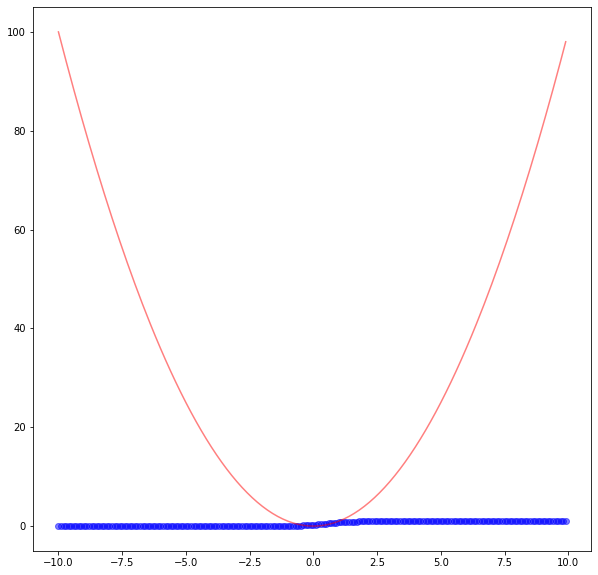

In [4]:
w = [2, -1]

g1 = lambda x: actsigmoid((x*w[0]) + w[1])

gys = [g1(i) for i in xs]


plt.figure(figsize=(10, 10))
plt.plot(xs, gys, 'bo', alpha = 0.5,)
plt.plot(xs, ys, 'r-', alpha = 0.5,)
plt.show()

In [5]:
import tensorflow as tf

In [6]:
data = tf.keras.datasets.mnist.load_data()

In [7]:
(trainx, trainy), (testx, testy) = data

In [8]:
trainx.shape

(60000, 28, 28)

In [9]:
jarvis = NeuralNetwork(
    name = 'Jarvis',
    layers = [
        Flatten((28, 28)),
        Layer(16, activation = actrelu),
        Layer(16, activation = actrelu),
        Layer(10, activation = actsigmoid),
    ]
)
print(jarvis.compile())

Jarvis:

No. of layers : 4
No. of training parameters : 13002

      ↓(28, 28)
Flatten Layer (784 cells)
      ↓784
      ↓784
Dense Layer (16 cells)
      ↓16
      ↓16
Dense Layer (16 cells)
      ↓16
      ↓16
Dense Layer (10 cells)
      ↓10





3


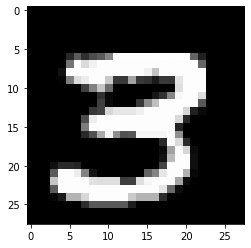

In [10]:
k = 111
plt.imshow(trainx[k], cmap = 'gray')
print(trainy[k])

In [11]:
output = jarvis.predict(trainx[0])
print(output.transpose())
print(trainy[0])

Recording shape: (784,)
Recording shape: (16,)
Recording shape: (16,)
Recording shape: (10,)
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
5


In [12]:
print(np.average(trainx[0]))

35.108418367346935


In [13]:
subsetx = trainx[:100]/255
subsety = np.zeros(shape = (100, 10))

for c in range(len(trainy[:100])):
    subsety[c] = [(1 if i == trainy[c] else 0) for i in range(10)]

In [14]:
yhat = jarvis.predict(subsetx)
subsety.shape

Recording shape: (784, 100)
Recording shape: (16, 100)
Recording shape: (16, 100)
Recording shape: (10, 100)


(100, 10)

In [15]:
jarvis.cost(subsetx, subsety)

Recording shape: (784, 100)
Recording shape: (16, 100)
Recording shape: (16, 100)
Recording shape: (10, 100)


3.0

In [16]:
yhat = jarvis.predict(subsetx)
yhat[:, :2]

Recording shape: (784, 100)
Recording shape: (16, 100)
Recording shape: (16, 100)
Recording shape: (10, 100)


array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [17]:
np.linalg.norm(yhat[:, :2] - subsety.transpose()[:, :2], axis=0)

array([3., 3.])

In [18]:
c = jarvis.cost(subsetx, subsety)
c

Recording shape: (784, 100)
Recording shape: (16, 100)
Recording shape: (16, 100)
Recording shape: (10, 100)


3.0

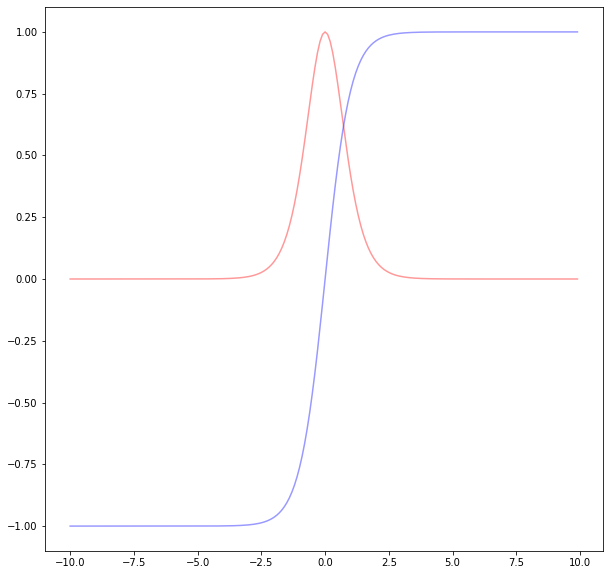

In [19]:
xs = [0.1 * i for i in range(-100, 100)]
ys1 = [acttanh(i) for i in xs]
ys2 = [dertanh(i) for i in xs]

plt.figure(figsize=(10, 10))
plt.plot(xs, ys1, 'b-', alpha = 0.4)
plt.plot(xs, ys2, 'r-', alpha = 0.4)
plt.show()

In [20]:
derivatives = {
    actnone : dernone,
    actswish : derswish
}

derivatives[actnone](0)

array(1)

In [21]:
print(jarvis.compile())

Jarvis:

No. of layers : 4
No. of training parameters : 13002

      ↓(28, 28)
Flatten Layer (784 cells)
      ↓784
      ↓784
Dense Layer (16 cells)
      ↓16
      ↓16
Dense Layer (16 cells)
      ↓16
      ↓16
Dense Layer (10 cells)
      ↓10





In [22]:
jarvis.fit(subsetx, subsety)

Recording shape: (784, 100)
Recording shape: (16, 100)
Recording shape: (16, 100)
Recording shape: (10, 100)
Reading shape : (16, 100)
Reading shape : (784, 100)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 17 is different from 16)

In [ ]:
print(len(jarvis.record))

5


In [ ]:
jarvis.deltas[-2].shape

(17, 100)

In [ ]:
np.array([1, 2, 3, 4]) * np.array([1, 2, 3, 4])

array([ 1,  4,  9, 16])

In [ ]:
b = np.zeros((20, 30))
d = np.concatenate((b, [[1 for i in range(30)]]), axis = 0)
d.shape

(21, 30)